In [22]:
import polars as pl
import os
from pathlib import Path
import pandas as pd
import hvplot.polars
import datetime


stock_data = Path.cwd().parent.parent / "Data/Stock_data/stock_data_ivs.csv"
stock_data1 = Path.cwd().parent / "Data/Stock_data/stock_data1.csv"
stock_data2 = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Stock_data/stock_data_new.csv"
# '/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Stock_data'
# parquet_file = (Path.cwd().parent / "Data/Option_data/SSO_complete")

data_path = Path.cwd().parent / "Data"

#Restrictions
timeperiod = [datetime.datetime(2018, 1, 1), datetime.datetime(2022, 1, 3)]

#Stock_split dates with quantity
nvidia_split = [datetime.datetime(2021, 7, 19), 4] #till 2021 needs to be split
amzn_split = [timeperiod[0], 20]
wmt_split = [timeperiod[0], 3]
tesla_split1 = [datetime.datetime(2020,8,28), 3]
tesla_split = [timeperiod[0], 5]
apple_split = [datetime.datetime(2020,8,28), 4]

In [23]:
df = pl.scan_csv(stock_data, separator=",")
df.schema
df.fetch(1000)

PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
i64,str,str,f64,f64,f64,i64,f64,f64,f64,f64
10107,"""2018-01-02""","""MSFT""",85.5,86.31,85.95,22484307,0.004793,85.92,85.93,0.004793
10107,"""2018-01-03""","""MSFT""",85.97,86.51,86.35,26061439,0.004654,86.32,86.33,0.004654
10107,"""2018-01-04""","""MSFT""",86.57,87.66,87.11,21911974,0.008801,87.11,87.12,0.008801
10107,"""2018-01-05""","""MSFT""",87.43,88.41,88.19,23433310,0.012398,88.11,88.12,0.012398
10107,"""2018-01-08""","""MSFT""",87.6046,88.58,88.28,22113207,0.00102,88.22,88.23,0.00102
…,…,…,…,…,…,…,…,…,…,…
10107,"""2021-12-14""","""MSFT""",324.10999,334.64001,328.34,44350980,-0.032587,328.48001,328.51999,-0.032587
10107,"""2021-12-15""","""MSFT""",324.5,335.19,334.64999,35284184,0.019218,334.66,334.67001,0.019218
10107,"""2021-12-16""","""MSFT""",323.01999,336.76001,324.89999,34946518,-0.029135,324.88,325.0,-0.029135


In [24]:
#Desired data types for the columns
int_cols = ["PERMNO", "VOL"]
float_cols = ["BIDLO", "ASKHI", "RET", "BID", "ASK", "RETX", "PRC"]
datetime_cols = ["date"]
str_cols = ["TICKER"]
# drop_cols = ["PERMCO"]

In [25]:
#one line to do all the above
df = df.with_columns(
    [ pl.col(int_cols).cast(pl.Int64),
      pl.col(float_cols).cast(pl.Float64),
      pl.col(datetime_cols).cast(pl.Date),
      pl.col(str_cols).cast(pl.String),
    ]
)

In [26]:
df.fetch(1000)

PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
i64,date,str,f64,f64,f64,i64,f64,f64,f64,f64
10107,2018-01-02,"""MSFT""",85.5,86.31,85.95,22484307,0.004793,85.92,85.93,0.004793
10107,2018-01-03,"""MSFT""",85.97,86.51,86.35,26061439,0.004654,86.32,86.33,0.004654
10107,2018-01-04,"""MSFT""",86.57,87.66,87.11,21911974,0.008801,87.11,87.12,0.008801
10107,2018-01-05,"""MSFT""",87.43,88.41,88.19,23433310,0.012398,88.11,88.12,0.012398
10107,2018-01-08,"""MSFT""",87.6046,88.58,88.28,22113207,0.00102,88.22,88.23,0.00102
…,…,…,…,…,…,…,…,…,…,…
10107,2021-12-14,"""MSFT""",324.10999,334.64001,328.34,44350980,-0.032587,328.48001,328.51999,-0.032587
10107,2021-12-15,"""MSFT""",324.5,335.19,334.64999,35284184,0.019218,334.66,334.67001,0.019218
10107,2021-12-16,"""MSFT""",323.01999,336.76001,324.89999,34946518,-0.029135,324.88,325.0,-0.029135


In [27]:
df.collect().approx_n_unique()

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_20896/3377993439.py:1: DeprecationWarning: `approx_n_unique` is deprecated. Use `select(pl.all().approx_n_unique())` instead.
  df.collect().approx_n_unique()


PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
10,1030,10,8468,8438,8425,9271,8598,8387,8372,8610


# Make adjustment to the bid and ask price collumns

In [28]:
#Change to pandas dataframe
df_pd = df.collect()

pd_df = df_pd.to_pandas()
#Change to the selected dates
pd_df = pd_df[(pd_df['date'] >= timeperiod[0]) & (pd_df['date'] <= timeperiod[1])]

#Change the name of the stocks
pd_df['TICKER'] = pd_df['TICKER'].replace('PCLN', 'BKNG')
pd_df['TICKER'] = pd_df['TICKER'].replace('IIVI', 'COHR')
pd_df['TICKER'] = pd_df['TICKER'].replace('FB', 'META')

unique_tickers = pd_df['TICKER'].unique()
print(unique_tickers)


['MSFT' 'META' 'AAPL' 'WMT' 'HD' 'AMZN' 'NVDA' 'COST' 'TSLA']


In [29]:
# Create a copy of pd_df
df_copy = pd_df.copy()

# Create a new column 'PRC_copy' that copies 'PRC'
df_copy['PRC_actual'] = df_copy['PRC']

#Nvidia
mask = (df_copy['TICKER'] == 'NVDA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= nvidia_split[0])
df_copy.loc[mask, ['PRC_actual']] /= nvidia_split[1]

#Amazon
mask1 = (df_copy['TICKER'] == 'AMZN') & (df_copy['date'] >= amzn_split[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask1, ['PRC_actual']] /= amzn_split[1]

#Walmarkt
mask2 = (df_copy['TICKER'] == 'WMT') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask2, ['PRC_actual']] /= wmt_split[1]

#Tesla
mask3 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
df_copy.loc[mask3, ['PRC_actual']] /= tesla_split1[1]

mask4 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= tesla_split1[0])
df_copy.loc[mask4, ['PRC_actual']] /= tesla_split[1]

#Apple
mask5 = (df_copy['TICKER'] == 'AAPL') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= apple_split[0])
df_copy.loc[mask5, ['PRC_actual']] /= apple_split[1]

df_copy.tail(500)

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,VOL,RET,BID,ASK,RETX,PRC_actual
8734,93436,2020-01-10,TSLA,473.70001,484.94000,478.14999,12936566,-0.006627,477.91000,478.17999,-0.006627,31.876666
8735,93436,2020-01-13,TSLA,492.00000,525.63000,524.85999,26585353,0.097689,524.84003,524.84998,0.097689,34.990666
8736,93436,2020-01-14,TSLA,524.90002,547.40997,537.91998,28955735,0.024883,537.90997,538.00000,0.024883,35.861332
8737,93436,2020-01-15,TSLA,516.78528,537.84003,518.50000,17326831,-0.036102,518.48999,518.77002,-0.036102,34.566667
8738,93436,2020-01-16,TSLA,492.17001,514.46002,513.48999,21676128,-0.009663,513.31000,513.48999,-0.009663,34.232666
...,...,...,...,...,...,...,...,...,...,...,...,...
9229,93436,2021-12-28,TSLA,1078.42004,1118.99988,1088.46997,20025526,-0.005000,1088.68005,1089.19995,-0.005000,362.823323
9230,93436,2021-12-29,TSLA,1064.14001,1104.00000,1086.18994,18699667,-0.002095,1085.56995,1085.88000,-0.002095,362.063313
9231,93436,2021-12-30,TSLA,1053.15002,1095.55005,1070.33997,15595484,-0.014592,1070.27002,1070.32996,-0.014592,356.779990
9232,93436,2021-12-31,TSLA,1054.58997,1081.99988,1056.78003,13530074,-0.012669,1056.89001,1057.23999,-0.012669,352.260010


In [30]:
# # Create a copy of pd_df
# df_copy = pd_df.copy()

# #Nvidia
# mask = (df_copy['TICKER'] == 'NVDA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= nvidia_split[0])
# df_copy.loc[mask, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= nvidia_split[1]

# #Amazon
# mask1 = (df_copy['TICKER'] == 'AMZN') & (df_copy['date'] >= amzn_split[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask1, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= amzn_split[1]

# #Walmarkt
# mask2 = (df_copy['TICKER'] == 'WMT') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask2, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= wmt_split[1]

# #Tesla
# mask3 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= timeperiod[1])
# df_copy.loc[mask3, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= tesla_split1[1]

# mask4 = (df_copy['TICKER'] == 'TSLA') & (df_copy['date'] >= timeperiod[0]) & (df_copy['date'] <= tesla_split1[0])
# df_copy.loc[mask4, ['BIDLO', 'ASKHI', 'BID', 'ASK', 'PRC']] /= tesla_split[1]

# # df_copy = df_copy[df_copy['TICKER'] == 'AMZN']

# df_copy.tail(500)


## Cum returns added

In [31]:
import pandas as pd
df_new = df_copy

# Assuming df_new is already defined as in your existing code

# Ensure that 'RET' is a float
df_new['RET'] = df_new['RET'].astype(float)

# Calculate the cumulative return for each stock and reset the index
cumulative_return = df_new.groupby('TICKER')['RET'].apply(lambda x: (1 + x).cumprod() - 1).reset_index(level=0, drop=True)

# Insert the 'cumulative_return' Series into the DataFrame
df_new['cumulative_return'] = cumulative_return

# Subtract the first value of the cumulative return for each group from the entire group
df_new['cumulative_return'] = df_new.groupby('TICKER')['cumulative_return'].transform(lambda x: x - x.iloc[0])

# Daily return indicator
df_new['daily_return_indicator_stock'] = df_new['RET'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# 5-day rolling return
df_new['5_day_rolling_return_stock'] = df_new.groupby('TICKER')['RET'].transform(
    lambda x: x.rolling(window=5, min_periods=5).apply(lambda y: (1 + y).prod() - 1, raw=True)
)
df_new['hi-lo_stock'] = df_new['ASKHI'] - df_new['BIDLO']

df_new['spread_stock'] = df_new['ASK'] - df_new['BID']

#Rename volume
df_new = df_new.rename(columns={'VOL': 'vol_stock'})

df_new.reset_index(drop=True, inplace=True)

df_new


,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,vol_stock,RET,BID,ASK,RETX,PRC_actual,cumulative_return,daily_return_indicator_stock,5_day_rolling_return_stock,hi-lo_stock,spread_stock
0,10107,2018-01-02,MSFT,85.50000,86.31000,85.95000,22484307,0.004793,85.92000,85.93000,0.004793,85.950000,0.000000,1,NaN,0.81000,0.01000
1,10107,2018-01-03,MSFT,85.97000,86.51000,86.35000,26061439,0.004654,86.32000,86.33000,0.004654,86.350000,0.004676,1,NaN,0.54000,0.01000
2,10107,2018-01-04,MSFT,86.57000,87.66000,87.11000,21911974,0.008801,87.11000,87.12000,0.008801,87.110000,0.013561,1,NaN,1.09000,0.01000
3,10107,2018-01-05,MSFT,87.43000,88.41000,88.19000,23433310,0.012398,88.11000,88.12000,0.012398,88.190000,0.026186,1,NaN,0.98000,0.01000
4,10107,2018-01-08,MSFT,87.60460,88.58000,88.28000,22113207,0.001020,88.22000,88.23000,0.001020,88.280000,0.027238,1,0.032031,0.97540,0.01000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,93436,2021-12-28,TSLA,1078.42004,1118.99988,1088.46997,20025526,-0.005000,1088.68005,1089.19995,-0.005000,362.823323,16.450349,-1,0.209492,40.57984,0.51990
9077,93436,2021-12-29,TSLA,1064.14001,1104.00000,1086.18994,18699667,-0.002095,1085.56995,1085.88000,-0.002095,362.063313,16.413729,-1,0.157331,39.85999,0.31005
9078,93436,2021-12-30,TSLA,1053.15002,1095.55005,1070.33997,15595484,-0.014592,1070.27002,1070.32996,-0.014592,356.779990,16.159197,-1,0.060930,42.40003,0.05994
9079,93436,2021-12-31,TSLA,1054.58997,1081.99988,1056.78003,13530074,-0.012669,1056.89001,1057.23999,-0.012669,352.260010,15.941434,-1,-0.009578,27.40991,0.34998


In [32]:
# timeperiod = [datetime.datetime(2018, 12, 30), datetime.datetime(2021, 12, 31)]

# df_new = df_new[(df_new['date'] >= timeperiod[0]) & (df_new['date'] <= timeperiod[1])]

In [33]:
df_newt = df_new.sort_values(by=['TICKER', 'PERMNO', 'date'])
df_newt

,PERMNO,date,TICKER,BIDLO,ASKHI,PRC,vol_stock,RET,BID,ASK,RETX,PRC_actual,cumulative_return,daily_return_indicator_stock,5_day_rolling_return_stock,hi-lo_stock,spread_stock
2018,14593,2018-01-02,AAPL,169.25999,172.30000,172.25999,25555934,0.017905,172.25000,172.25999,0.017905,43.064997,0.000000,1,NaN,3.04001,0.00999
2019,14593,2018-01-03,AAPL,171.96001,174.55000,172.23000,29517900,-0.000174,172.17999,172.19000,-0.000174,43.057500,-0.000177,-1,NaN,2.58999,0.01001
2020,14593,2018-01-04,AAPL,172.08000,173.47000,173.03000,22434597,0.004645,173.02000,173.03000,0.004645,43.257500,0.004550,1,NaN,1.39000,0.01000
2021,14593,2018-01-05,AAPL,173.05000,175.37000,175.00000,23660018,0.011385,174.96001,174.97000,0.011385,43.750000,0.016191,1,NaN,2.32000,0.00999
2022,14593,2018-01-08,AAPL,173.92999,175.61000,174.35001,20567766,-0.003714,174.32001,174.34000,-0.003714,43.587502,0.012350,-1,0.030255,1.68001,0.01999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,55976,2021-12-28,WMT,140.60001,142.97000,142.78000,5263016,0.014351,142.78999,142.81000,0.014351,47.593333,0.561551,1,0.025719,2.36999,0.02001
4032,55976,2021-12-29,WMT,142.32001,143.53000,142.71001,4348420,-0.000490,142.71001,142.72000,-0.000490,47.570003,0.560787,-1,0.022133,1.20999,0.00999
4033,55976,2021-12-30,WMT,142.48000,143.69501,143.17000,4982997,0.003223,143.17000,143.17999,0.003223,47.723333,0.565812,1,0.024107,1.21501,0.00999
4034,55976,2021-12-31,WMT,142.92000,145.04500,144.69000,5982595,0.010617,144.71001,144.72000,0.010617,48.230000,0.582419,1,0.037280,2.12500,0.00999


# Shifted version

In [56]:
import pandas as pd

# Assuming df_newt is already defined
df_shifted = df_newt.copy()

# Save the 'TICKER' column before the shift operation
ticker_column = df_shifted['TICKER']

# Shift all columns by one row within each 'TICKER' group
df_shifted = df_shifted.groupby(['TICKER']).shift(1)

# Merge the 'TICKER' column back into the DataFrame
df_shifted['TICKER'] = ticker_column

# Reset the index
df_shifted = df_shifted.reset_index(drop=True)

# Display the shifted DataFrame
df_shifted


,PERMNO,date,BIDLO,ASKHI,PRC,vol_stock,RET,BID,ASK,RETX,PRC_actual,cumulative_return,daily_return_indicator_stock,5_day_rolling_return_stock,hi-lo_stock,spread_stock,TICKER
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AAPL
1,14593.0,2018-01-02,169.25999,172.30000,172.25999,25555934.0,0.017905,172.25000,172.25999,0.017905,43.064997,0.000000,1.0,NaN,3.04001,0.00999,AAPL
2,14593.0,2018-01-03,171.96001,174.55000,172.23000,29517900.0,-0.000174,172.17999,172.19000,-0.000174,43.057500,-0.000177,-1.0,NaN,2.58999,0.01001,AAPL
3,14593.0,2018-01-04,172.08000,173.47000,173.03000,22434597.0,0.004645,173.02000,173.03000,0.004645,43.257500,0.004550,1.0,NaN,1.39000,0.01000,AAPL
4,14593.0,2018-01-05,173.05000,175.37000,175.00000,23660018.0,0.011385,174.96001,174.97000,0.011385,43.750000,0.016191,1.0,NaN,2.32000,0.00999,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9076,55976.0,2021-12-27,139.57001,140.87000,140.75999,5351125.0,0.009105,140.77000,140.78999,0.009105,46.919997,0.539481,1.0,0.014487,1.29999,0.01999,WMT
9077,55976.0,2021-12-28,140.60001,142.97000,142.78000,5263016.0,0.014351,142.78999,142.81000,0.014351,47.593333,0.561551,1.0,0.025719,2.36999,0.02001,WMT
9078,55976.0,2021-12-29,142.32001,143.53000,142.71001,4348420.0,-0.000490,142.71001,142.72000,-0.000490,47.570003,0.560787,-1.0,0.022133,1.20999,0.00999,WMT
9079,55976.0,2021-12-30,142.48000,143.69501,143.17000,4982997.0,0.003223,143.17000,143.17999,0.003223,47.723333,0.565812,1.0,0.024107,1.21501,0.00999,WMT


In [58]:
timeperiod = [datetime.datetime(2018, 12, 31), datetime.datetime(2022, 1, 1)]
df_final = df_shifted[(df_shifted['date'] >= timeperiod[0]) & (df_shifted['date'] <= timeperiod[1])]
df_final

,PERMNO,date,BIDLO,ASKHI,PRC,vol_stock,RET,BID,ASK,RETX,PRC_actual,cumulative_return,daily_return_indicator_stock,5_day_rolling_return_stock,hi-lo_stock,spread_stock,TICKER
250,14593.0,2018-12-31,154.55000,158.52000,156.23000,42291347.0,0.000512,156.22000,156.24001,0.000512,39.057500,-0.080877,1.0,-0.003826,3.97000,0.02001,AAPL
251,14593.0,2019-01-02,156.48000,159.36000,157.74001,35003466.0,0.009665,157.92999,157.94000,0.009665,39.435003,-0.071821,1.0,0.046507,2.88000,0.01001,AAPL
252,14593.0,2019-01-03,154.23000,158.85001,157.92000,37066356.0,0.001141,157.91000,157.92999,0.001141,39.480000,-0.070741,1.0,0.075529,4.62001,0.01999,AAPL
253,14593.0,2019-01-04,142.00000,145.72000,142.19000,91373695.0,-0.099607,142.08000,142.09000,-0.099607,35.547500,-0.165085,-1.0,-0.095311,3.72000,0.01000,AAPL
254,14593.0,2019-01-07,143.80000,148.54990,148.25999,58603001.0,0.042689,148.25000,148.25999,0.042689,37.064997,-0.128679,1.0,-0.050529,4.74990,0.00999,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,55976.0,2021-12-27,138.85001,140.16000,139.49001,5864216.0,-0.002217,139.49001,139.50000,-0.002217,46.496670,0.525605,-1.0,-0.026860,1.30999,0.00999,WMT
9076,55976.0,2021-12-28,139.57001,140.87000,140.75999,5351125.0,0.009105,140.77000,140.78999,0.009105,46.919997,0.539481,1.0,0.014487,1.29999,0.01999,WMT
9077,55976.0,2021-12-29,140.60001,142.97000,142.78000,5263016.0,0.014351,142.78999,142.81000,0.014351,47.593333,0.561551,1.0,0.025719,2.36999,0.02001,WMT
9078,55976.0,2021-12-30,142.32001,143.53000,142.71001,4348420.0,-0.000490,142.71001,142.72000,-0.000490,47.570003,0.560787,-1.0,0.022133,1.20999,0.00999,WMT


In [62]:
# Ensure the 'date' column is in datetime format
df_shifted['date'] = pd.to_datetime(df_final['date'])

# Define the specific dates
dates = ['2019-01-04', '2021-12-28']

# Filter the DataFrame for the specific dates
filtered_df = df_final[df_final['date'].isin(dates)]

# Pivot the DataFrame to get PRC_actual for each ticker on the specific dates
result = filtered_df.pivot_table(index='TICKER', columns='date', values='PRC_actual')

result

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_20896/2255361971.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ms] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = df_final[df_final['date'].isin(dates)]


date,2019-01-04,2021-12-28
TICKER,,
AAPL,35.547500,180.330000
AMZN,75.014001,169.669494
COST,200.420000,563.469970
HD,168.610000,404.090000
META,131.740010,346.179990
MSFT,97.400000,342.450010
NVDA,31.997500,309.450010
TSLA,20.023999,364.646647
WMT,30.953333,46.919997


# Save the results to a file

In [63]:
# Saving file
stock_path_parq = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Stock_data/stock_data_new.parquet"

save_parquet = True
if save_parquet or not os.path.exists(stock_path_parq):
    df_final.to_parquet(stock_path_parq)

In [37]:
stock_path_parq = "/Users/sbjpipers/Desktop/FinalThesisQF/FinalThesisQF/Data/Stock_data/stock_data_new.parquet"
df = pl.read_parquet(stock_path_parq)
df.estimated_size("mb")

0.8566188812255859

In [38]:
df

date,BIDLO,ASKHI,PRC,vol_stock,RET,BID,ASK,RETX,PRC_actual,cumulative_return,daily_return_indicator_stock,5_day_rolling_return_stock,hi-lo_stock,spread_stock,TICKER,__index_level_0__
datetime[ms],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64
2018-12-31 00:00:00,156.48,159.36,157.74001,3.5003466e7,0.009665,157.92999,157.94,0.009665,39.435003,-0.071821,1.0,0.046507,2.88,0.01001,"""MSFT""",251
2019-01-02 00:00:00,154.23,158.85001,157.92,3.7066356e7,0.001141,157.91,157.92999,0.001141,39.48,-0.070741,1.0,0.075529,4.62001,0.01999,"""MSFT""",252
2019-01-03 00:00:00,142.0,145.72,142.19,9.1373695e7,-0.099607,142.08,142.09,-0.099607,35.5475,-0.165085,-1.0,-0.095311,3.72,0.01,"""MSFT""",253
2019-01-04 00:00:00,143.8,148.5499,148.25999,5.8603001e7,0.042689,148.25,148.25999,0.042689,37.064997,-0.128679,1.0,-0.050529,4.7499,0.00999,"""MSFT""",254
2019-01-07 00:00:00,145.89999,148.83,147.92999,5.4770364e7,-0.002226,147.83,147.89,-0.002226,36.982498,-0.130659,-1.0,-0.053127,2.93001,0.06,"""MSFT""",255
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2021-12-27 00:00:00,139.57001,140.87,140.75999,5.351125e6,0.009105,140.77,140.78999,0.009105,46.919997,0.539481,1.0,0.014487,1.29999,0.01999,"""TSLA""",9076
2021-12-28 00:00:00,140.60001,142.97,142.78,5.263016e6,0.014351,142.78999,142.81,0.014351,47.593333,0.561551,1.0,0.025719,2.36999,0.02001,"""TSLA""",9077
2021-12-29 00:00:00,142.32001,143.53,142.71001,4.34842e6,-0.00049,142.71001,142.72,-0.00049,47.570003,0.560787,-1.0,0.022133,1.20999,0.00999,"""TSLA""",9078


## Use the original file with filtering instead of the parquet file

In [41]:
pd_df = df_copy

print(type(df))

# pd_df = df.to_pandas()



<class 'polars.dataframe.frame.DataFrame'>


## Visuals of the different stocks

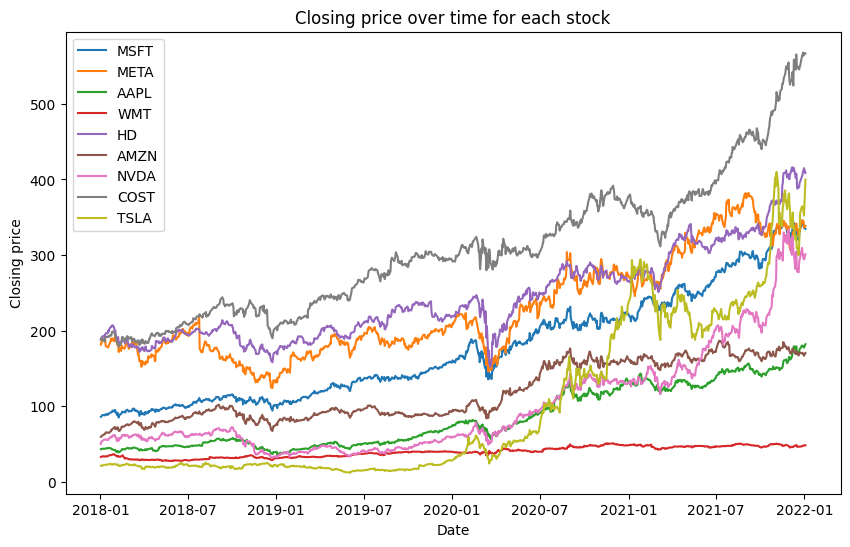

In [46]:
import matplotlib.pyplot as plt

# Ensure that 'date' is a datetime object
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Get the list of unique tickers
tickers = pd_df['TICKER'].unique()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a line for each ticker
for ticker in tickers:
    if ticker != "BKNG":
        df_ticker = pd_df[pd_df['TICKER'] == ticker]
        plt.plot(df_ticker['date'], df_ticker['PRC_actual'], label=ticker)
    
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Closing price over time for each stock')

# Add a legend
plt.legend()

# Show the plot
plt.show()

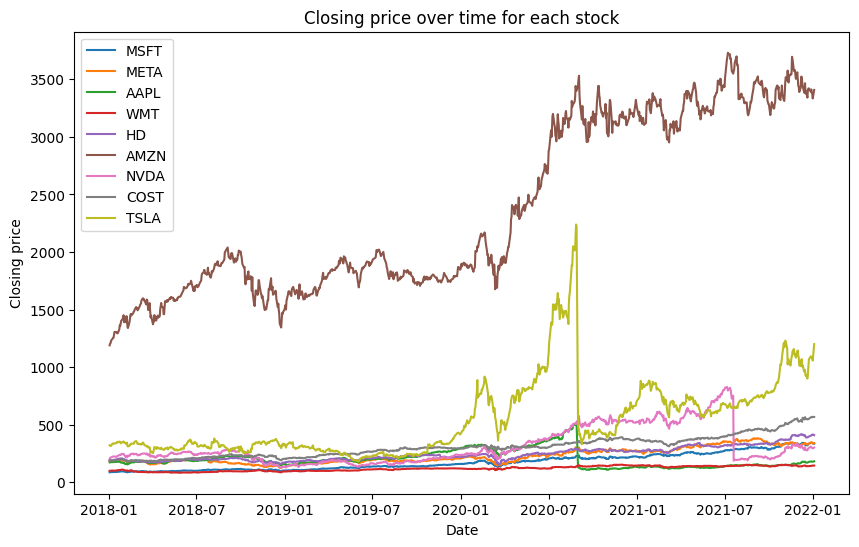

In [45]:
import matplotlib.pyplot as plt

# Ensure that 'date' is a datetime object
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Get the list of unique tickers
tickers = pd_df['TICKER'].unique()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a line for each ticker
for ticker in tickers:
    if ticker != "BKNG":
        df_ticker = pd_df[pd_df['TICKER'] == ticker]
        plt.plot(df_ticker['date'], df_ticker['PRC'], label=ticker)
    
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Closing price over time for each stock')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [53]:
# Ensure the 'date' column is in datetime format
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Define the specific dates
dates = ['2019-01-04', '2021-12-28']

# Filter the DataFrame for the specific dates
filtered_df = pd_df[pd_df['date'].isin(dates)]

# Pivot the DataFrame to get PRC_actual for each ticker on the specific dates
result = filtered_df.pivot_table(index='TICKER', columns='date', values='PRC_actual')

result

/var/folders/b4/wn87d6495j1_vytb8m33q3mm0000gn/T/ipykernel_20896/388943996.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ms] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  filtered_df = pd_df[pd_df['date'].isin(dates)]


date,2019-01-04,2021-12-28
TICKER,,
AAPL,37.064997,179.289990
AMZN,78.769501,170.660999
COST,206.240010,564.640010
HD,173.620000,406.220000
META,137.950000,346.220000
MSFT,101.930000,341.250000
NVDA,34.047500,303.220000
TSLA,21.179333,362.823323
WMT,31.146667,47.593333


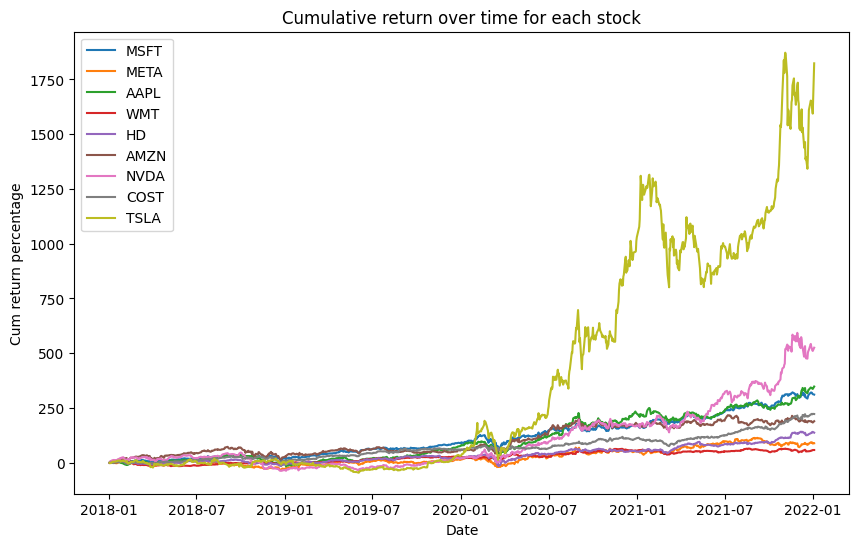

In [44]:
import matplotlib.pyplot as plt

# Ensure that 'date' is a datetime object
pd_df['date'] = pd.to_datetime(pd_df['date'])

# Get the list of unique tickers
tickers = pd_df['TICKER'].unique()

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot a line for each ticker
for ticker in tickers:
    # if ticker != "BKNG":
    df_ticker = pd_df[pd_df['TICKER'] == ticker]
    plt.plot(df_ticker['date'], df_ticker['cumulative_return']*100, label=ticker)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Cum return percentage')
plt.title('Cumulative return over time for each stock')

# Add a legend
plt.legend()

# Show the plot
plt.show()